In [1]:
! pip install git+https://github.com/wittawatj/kernel-gof.git

  Cloning https://github.com/wittawatj/kernel-gof.git to /tmp/pip-req-build-pg9nejrz
  Running command git clone -q https://github.com/wittawatj/kernel-gof.git /tmp/pip-req-build-pg9nejrz


In [2]:
! pip install hyppo

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import kgof
import kgof.data as data
import kgof.density as density
import kgof.goftest as gof
import kgof.kernel as kernel
import kgof.util as util
import matplotlib
import matplotlib.pyplot as plt
import autograd.numpy as np
import scipy.stats as stats

In [17]:
# Assuming two dimensions.
def isogauss_log_den(X):
  mean = np.zeros(2)
  variance = 1
  unden = -np.sum((X - mean)**2, 1) / (2.0 * variance)
  return unden

In [18]:
p = density.from_log_den(2, isogauss_log_den) # UnnormalizedDensity object

In [19]:
# Drawing n points from q
m = 1 # If m = 0, p = q and H_0 is true

seed = 4
np.random.seed(seed)
n = 400
X = np.random.randn(n, 2) + np.array([m, 0])

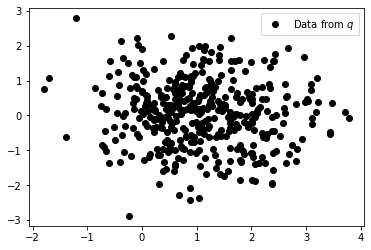

In [20]:
# Plotting the data from q
plt.plot(X[:, 0], X[:, 1], 'ko', label='Data from $q$')
plt.legend()

In [21]:
# dat will be fed to the test.
dat = data.Data(X) # Creates a Data object here, whereas for the hyppo implementation I'd pass X through

In [22]:
# 20% for parameter tuning, and 80% for testing
train, test = dat.split_tr_te(tr_proportion=0.2, seed=2)

# What would need to be done for our module that does not depend on the Data object
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(X, test_size = 0.8, random_state = 42)

In [23]:
# J is the # of test locs (features), not larger than 10
J = 1

opts = {
    'reg': 1e-2, # regularization parameter in the optimization objective
    'max_iter': 50, # maximum number of gradient ascent iterations
    'tol_fun':1e-7, # termination tolerance of the objective
}

# make sure to give train (NOT test).
# do the optimization with the options in opts.
V_opt, gw_opt, opt_info = gof.GaussFSSD.optimize_auto_init(p, train, J, **opts)

In [24]:
opt_info

{'fun': -0.6387517401665469,
 'hess_inv': <3x3 LbfgsInvHessProduct with dtype=float64>,
 'jac': array([ 2.53782181e-07, -2.69935213e-07, -6.56305723e-07]),
 'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
 'nfev': 21,
 'nit': 12,
 'status': 0,
 'success': True,
 'time_secs': 0.172257661819458,
 'x': array([ 3.22221986, -2.14666395,  0.07170879])}

In [25]:
alpha = 0.01 # significance level of the test (99% confidence)
fssd_opt = gof.GaussFSSD(p, gw_opt, V_opt, alpha)

In [26]:
# Perform FSSD GoF test using testing data 'test'

test_result = fssd_opt.perform_test(test)
test_result

{'alpha': 0.01,
 'h0_rejected': True,
 'n_simulate': 3000,
 'pvalue': 0.0,
 'test_stat': 66.12470839770019,
 'time_secs': 0.0031952857971191406}

In [27]:
# Drawing n points from q
m = 0 # If m = 0, p = q and H_0 is true

seed = 4
np.random.seed(seed)
n = 400
X = np.random.randn(n, 2) + np.array([m, 0])

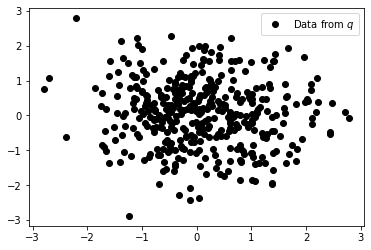

In [28]:
# Plotting the data from q
plt.plot(X[:, 0], X[:, 1], 'ko', label='Data from $q$')
plt.legend()

In [29]:
# dat will be fed to the test.
dat = data.Data(X) # Creates a Data object here, whereas for the hyppo implementation I'd pass X through

In [30]:
# 20% for parameter tuning, and 80% for testing
train, test = dat.split_tr_te(tr_proportion=0.2, seed=2)

# What would need to be done for our module that does not depend on the Data object
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(X, test_size = 0.8, random_state = 42)

In [31]:
# J is the # of test locs (features), not larger than 10
J = 1

opts = {
    'reg': 1e-2, # regularization parameter in the optimization objective
    'max_iter': 50, # maximum number of gradient ascent iterations
    'tol_fun':1e-7, # termination tolerance of the objective
}

# make sure to give train (NOT test).
# do the optimization with the options in opts.
V_opt, gw_opt, opt_info = gof.GaussFSSD.optimize_auto_init(p, train, J, **opts)

In [32]:
alpha = 0.01 # significance level of the test (99% confidence)
fssd_opt = gof.GaussFSSD(p, gw_opt, V_opt, alpha)

In [33]:
# Perform FSSD GoF test using testing data 'test'

test_result = fssd_opt.perform_test(test)
test_result

{'alpha': 0.01,
 'h0_rejected': False,
 'n_simulate': 3000,
 'pvalue': 0.774,
 'test_stat': -0.1546149094162846,
 'time_secs': 0.00244140625}